In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
df = pd.read_csv("University Students Monthly Expenses.csv")
df

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
101,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
102,Male,22,3.0,Hostel,No,Yes,Car,NaN,Yes,Yes,No,No,150.0
103,Female,21,2.0,Home,Yes,No,No,No,No,Yes,No,Yes,200.0


In [4]:
df.columns

Index(['Gender', 'Age', 'Study_year', 'Living', 'Scholarship', 'Part_time_job',
       'Transporting', 'Smoking', 'Drinks', 'Games_&_Hobbies',
       'Cosmetics_&_Self-care', 'Monthly_Subscription', 'Monthly_expenses_$'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=105, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 105 non-null    object 
 1   Age                    105 non-null    int64  
 2   Study_year             101 non-null    float64
 3   Living                 103 non-null    object 
 4   Scholarship            105 non-null    object 
 5   Part_time_job          100 non-null    object 
 6   Transporting           91 non-null     object 
 7   Smoking                94 non-null     object 
 8   Drinks                 92 non-null     object 
 9   Games_&_Hobbies        105 non-null    object 
 10  Cosmetics_&_Self-care  92 non-null     object 
 11  Monthly_Subscription   96 non-null     object 
 12  Monthly_expenses_$     99 non-null     float64
dtypes: float64(2), int64(1), object(10)
memory usage: 10.8+ KB


In [8]:
#checking for null values
df.isnull()

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,False,False,False,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,True,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#dropping null values
df.dropna(inplace  = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 64 non-null     object 
 1   Age                    64 non-null     int64  
 2   Study_year             64 non-null     float64
 3   Living                 64 non-null     object 
 4   Scholarship            64 non-null     object 
 5   Part_time_job          64 non-null     object 
 6   Transporting           64 non-null     object 
 7   Smoking                64 non-null     object 
 8   Drinks                 64 non-null     object 
 9   Games_&_Hobbies        64 non-null     object 
 10  Cosmetics_&_Self-care  64 non-null     object 
 11  Monthly_Subscription   64 non-null     object 
 12  Monthly_expenses_$     64 non-null     float64
dtypes: float64(2), int64(1), object(10)
memory usage: 7.0+ KB


In [16]:
#Age of participants
df["Age"].nunique()

6

In [18]:
df["Transporting"]

0              No
1      Motorcycle
3      Motorcycle
4      Motorcycle
6              No
          ...    
95            Car
98     Motorcycle
100    Motorcycle
101    Motorcycle
103            No
Name: Transporting, Length: 64, dtype: object

In [19]:
#statistics
df.describe()

,Age,Study_year,Monthly_expenses_$
count,64.000000,64.000000,64.000000
mean,19.750000,2.609375,223.593750
std,1.910705,1.033060,61.807874
min,17.000000,1.000000,140.000000
25%,18.000000,2.000000,180.000000
50%,19.000000,2.000000,200.000000
75%,22.000000,4.000000,262.500000
max,25.000000,4.000000,350.000000


In [20]:
df.corr()

,Age,Study_year,Monthly_expenses_$
Age,1.000000,0.802146,0.449928
Study_year,0.802146,1.000000,0.328105
Monthly_expenses_$,0.449928,0.328105,1.000000


In [21]:
#common age among students
df["Age"].mode()

0    18
1    22
Name: Age, dtype: int64

In [22]:
#common living place
df["Living"].mode()

0    Home
Name: Living, dtype: object

In [23]:
df["Part_time_job"].mode()

0    No
Name: Part_time_job, dtype: object

In [25]:
df

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
6,Female,21,2.0,Home,Yes,No,No,No,No,Yes,No,Yes,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,17,1.0,Home,No,No,Car,No,No,No,No,No,250.0
98,Female,19,3.0,Home,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
100,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
101,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


In [50]:
#GROUPINGS
#grouping by monthly expenses, Age, gender age sudy year
Basic = df.groupby(by = ["Age", "Gender", "Study_year", "Monthly_expenses_$"])["Age"].count().reset_index(name = "count")
Basic = Basic.sort_values("Monthly_expenses_$", ascending = False)
Basic = Basic.set_index("Monthly_expenses_$")
Basic

,Age,Gender,Study_year,count
Monthly_expenses_$,,,,
350.0,22,Male,3.0,4
300.0,19,Female,2.0,3
300.0,22,Male,4.0,2
300.0,18,Female,2.0,2
300.0,22,Female,4.0,5
250.0,17,Female,1.0,4
250.0,22,Male,4.0,4
250.0,19,Male,2.0,2
220.0,22,Female,4.0,2


In [101]:
Work = df.groupby(by =["Monthly_expenses_$", "Age","Living", "Scholarship", "Part_time_job", "Monthly_Subscription", "Study_year"
                      ])["Age"].count().reset_index(name = "count")
Work = Work.set_index("Monthly_expenses_$")
Work = Work.sort_values("Monthly_expenses_$", ascending = False)
Work

,Age,Living,Scholarship,Part_time_job,Monthly_Subscription,Study_year,count
Monthly_expenses_$,,,,,,,
350.0,22,Home,No,No,Yes,3.0,4
300.0,22,Hostel,Yes,Yes,Yes,4.0,5
300.0,22,Home,Yes,No,Yes,4.0,2
300.0,19,Home,No,No,No,2.0,3
300.0,18,Home,No,No,No,2.0,2
250.0,22,Home,No,No,No,4.0,4
250.0,19,Home,No,No,No,2.0,2
250.0,17,Home,No,No,No,1.0,4
220.0,25,Hostel,No,Yes,Yes,3.0,1


In [49]:
life_style = df.groupby(by = ["Age", "Gender", "Study_year","Monthly_expenses_$", "Smoking", "Drinks", "Games_&_Hobbies", "Cosmetics_&_Self-care"])["Age"].count().reset_index(name = "count")
life_style = life_style.set_index("Monthly_expenses_$")
life_style = life_style.sort_values("Monthly_expenses_$", ascending = False)
life_style

,Age,Gender,Study_year,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,count
Monthly_expenses_$,,,,,,,,
350.0,22,Male,3.0,No,No,No,Yes,4
300.0,19,Female,2.0,No,No,No,Yes,3
300.0,22,Male,4.0,Yes,Yes,Yes,No,2
300.0,18,Female,2.0,Yes,No,Yes,Yes,2
300.0,22,Female,4.0,No,No,No,Yes,5
250.0,17,Female,1.0,No,No,No,No,4
250.0,22,Male,4.0,No,No,Yes,No,4
250.0,19,Male,2.0,Yes,Yes,Yes,No,2
220.0,22,Female,4.0,No,No,Yes,No,2


In [51]:
#Queries for students above 20 years old
Basic_Query = Basic.query("`Age`> 20")
Basic_Query

,Age,Gender,Study_year,count
Monthly_expenses_$,,,,
350.0,22,Male,3.0,4
300.0,22,Male,4.0,2
300.0,22,Female,4.0,5
250.0,22,Male,4.0,4
220.0,22,Female,4.0,2
220.0,25,Male,3.0,1
200.0,21,Female,2.0,3
200.0,22,Female,4.0,2
150.0,21,Female,2.0,1


In [102]:
#Query for students with expenses of more then 220$ per month
Work_Query = Work.query("`Monthly_expenses_$` > 220")
Work_Query

,Age,Living,Scholarship,Part_time_job,Monthly_Subscription,Study_year,count
Monthly_expenses_$,,,,,,,
350.0,22,Home,No,No,Yes,3.0,4
300.0,22,Hostel,Yes,Yes,Yes,4.0,5
300.0,22,Home,Yes,No,Yes,4.0,2
300.0,19,Home,No,No,No,2.0,3
300.0,18,Home,No,No,No,2.0,2
250.0,22,Home,No,No,No,4.0,4
250.0,19,Home,No,No,No,2.0,2
250.0,17,Home,No,No,No,1.0,4


In [53]:
#life style Query
life_style_Query = life_style.query("`Monthly_expenses_$` > 220")
life_style_Query

,Age,Gender,Study_year,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,count
Monthly_expenses_$,,,,,,,,
350.0,22,Male,3.0,No,No,No,Yes,4
300.0,19,Female,2.0,No,No,No,Yes,3
300.0,22,Male,4.0,Yes,Yes,Yes,No,2
300.0,18,Female,2.0,Yes,No,Yes,Yes,2
300.0,22,Female,4.0,No,No,No,Yes,5
250.0,17,Female,1.0,No,No,No,No,4
250.0,22,Male,4.0,No,No,Yes,No,4
250.0,19,Male,2.0,Yes,Yes,Yes,No,2


Text(0.5, 1.0, 'Basic Query')

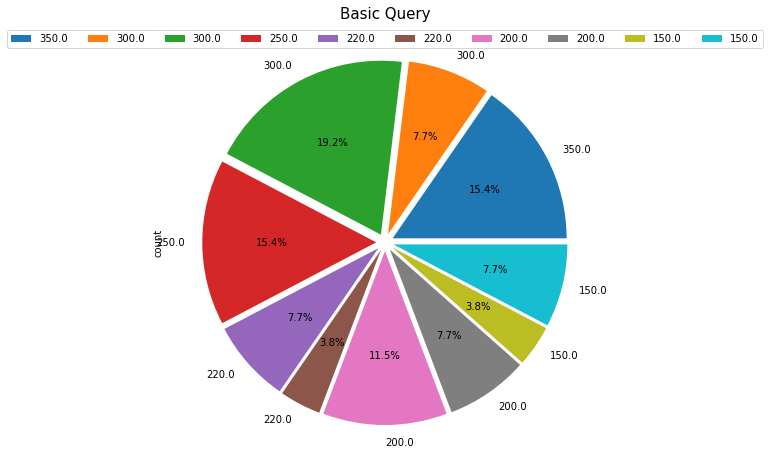

In [81]:
#visualization
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
Basic_Query.plot.pie(y = "count", autopct='%.1f%%', figsize=(8,8), explode = explode)
plt.legend(ncol=10, loc="upper center")
plt.title("Basic Query", fontsize  = 15)

Text(0.5, 1.0, 'Monthly expenses vs Study year')

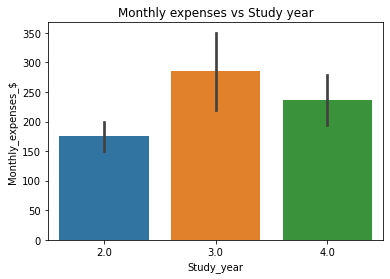

In [97]:
sns.barplot(x = Basic_Query.reset_index()["Study_year"],  y = Basic_Query.reset_index()["Monthly_expenses_$"])
plt.title("Monthly expenses vs Study year")


Text(0.5, 1.0, 'Study_Year, Exppenses and Living')

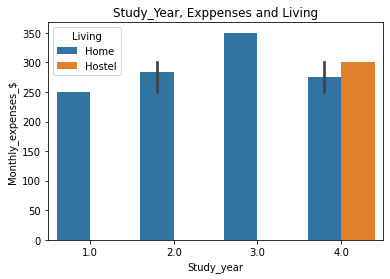

In [104]:
sns.barplot(x = Work_Query.reset_index()["Study_year"], y = Work_Query.reset_index()["Monthly_expenses_$"], hue = Work_Query.reset_index()["Living"])
plt.title("Study_Year, Exppenses and Living")

<AxesSubplot:xlabel='Study_year', ylabel='Monthly_expenses_$'>

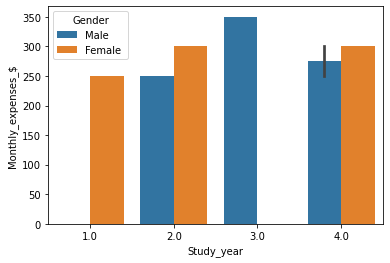

In [108]:
sns.barplot(x = life_style_Query.reset_index()["Study_year"], y  = life_style_Query.reset_index()["Monthly_expenses_$"], hue = life_style_Query.reset_index()["Gender"])

Text(0.5, 1.0, 'Expenses, Study_year, Smoking')

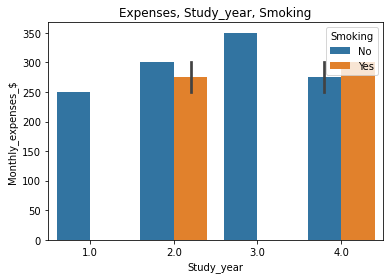

In [113]:
sns.barplot(x = life_style_Query.reset_index()["Study_year"], y  = life_style_Query.reset_index()["Monthly_expenses_$"], hue = life_style_Query.reset_index()["Smoking"])
plt.title("Expenses, Study_year, Smoking")

Text(0.5, 1.0, 'Expenses, Age, Drinks')

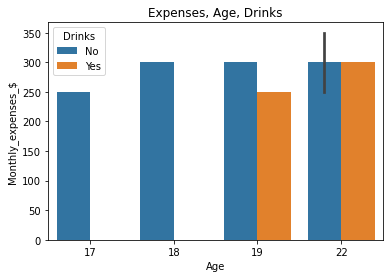

In [114]:
sns.barplot(x = life_style_Query.reset_index()["Age"], y  = life_style_Query.reset_index()["Monthly_expenses_$"], hue = life_style_Query.reset_index()["Drinks"])
plt.title("Expenses, Age, Drinks")